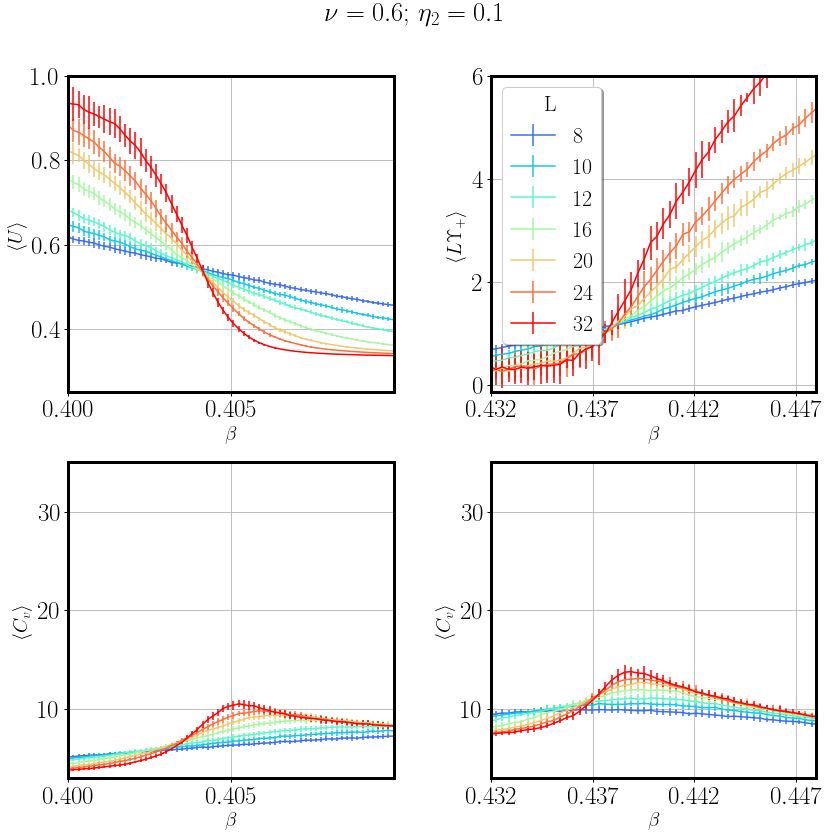

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(12,12))
fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[0,0].set_xlabel(r"$\beta$")
ax1[0,1].set_xlabel(r"$\beta$")
ax1[1,0].set_xlabel(r"$\beta$")
ax1[1,1].set_xlabel(r"$\beta$")

ax1[0,0].set_ylabel(r"$\langle U \rangle$")
ax1[0,1].set_ylabel(r"$\langle L\Upsilon_{+} \rangle$")
#ax1[2].set_ylabel(r"$\langle L\Upsilon_{-} \rangle$")
ax1[1,0].set_ylabel(r"$\langle C_v \rangle$")
ax1[1,1].set_ylabel(r"$\langle C_v \rangle$")

ax1[0,1].set_xlim((0.432,0.448))
xticks = np.arange(0.432, 0.448, 0.005)
ax1[0,1].set_xticks(xticks)
ax1[1,1].set_xlim((0.432,0.448))
xticks = np.arange(0.432, 0.448, 0.005)
ax1[1,1].set_xticks(xticks)

ax1[0,0].set_xlim((0.4,0.41))
xticks = np.arange(0.4, 0.41, 0.005)
ax1[0,0].set_xticks(xticks)
ax1[1,0].set_xlim((0.4,0.41))
xticks = np.arange(0.4, 0.41, 0.005)
ax1[1,0].set_xticks(xticks)

ax1[0,0].grid()
ax1[0,1].grid()
ax1[1,0].grid()
ax1[1,1].grid()

ax1[0,0].set_ylim((0.25,1))
ax1[0,1].set_ylim((-0.15,6))
ax1[1,0].set_ylim((3,35))
ax1[1,1].set_ylim((3,35))

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0,0].errorbar(beta_U, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[0,1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[1,0].errorbar(beta_U, Cv_U,yerr=err_Cv_U, fmt= "-", c=c_m, label="%s" %L)
    ax1[1,1].errorbar(beta, Cv,yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

ax1[0,1].legend(loc="best", title="L")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.9)
fig.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s.png" %(folder_fig, e, nu, eta1, eta2) )



Old: [0.009744 0.010916 0.010867 0.009983 0.008987 0.01019  0.009258 0.009135
 0.010684 0.00963  0.010782 0.011922 0.010112 0.010542 0.010409 0.011088
 0.010955 0.010887 0.009139 0.011104 0.010945 0.011454 0.012153 0.009892
 0.009959 0.010225 0.011017 0.010004 0.011013 0.010803 0.009558 0.010667
 0.010771 0.008707 0.009649 0.008433 0.009575 0.009528 0.009523 0.00975
 0.009186 0.007906 0.007984 0.008465 0.008425 0.007472 0.007127 0.00816
 0.006725 0.008411 0.007241 0.007676 0.008272 0.007812 0.006148 0.008158
 0.006862 0.007422 0.005903 0.006673 0.005789 0.006839 0.005567 0.007606]
New: [0.006016 0.01007  0.008365 0.009583 0.007123 0.016272 0.008646 0.011374
 0.010874 0.007826 0.009617 0.009919 0.009246 0.008156 0.012247 0.010488
 0.010386 0.013392 0.006471 0.010674 0.010086 0.013574 0.009117 0.015019
 0.005867 0.008052 0.0091   0.013245 0.009405 0.00761  0.006405 0.012583
 0.008128 0.010326 0.009186 0.01069  0.00795  0.010003 0.009932 0.010757
 0.006198 0.007896 0.008487 0.007    0.010

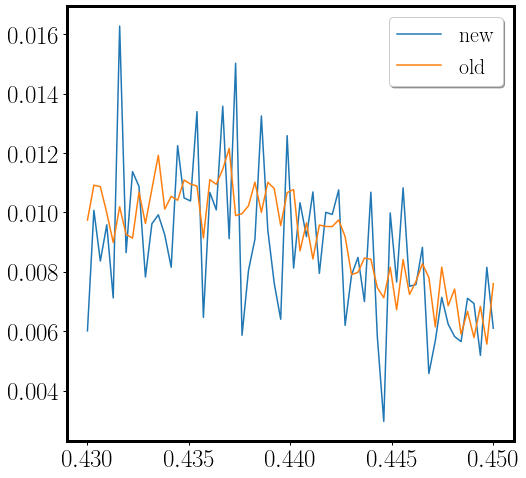

In [23]:
e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))


for L in LLIST:

    HOMEDIR2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s/old" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta2, J_sum2, err_J_sum2=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR2,  usecols=(0,1,2), unpack=True )

    data_U2=np.loadtxt("%s/L%s_nu%s_Binder_cumulant.txt" %(BASEDIR2, L, nu))
    beta_U2= data_U2[0]
    U2= data_U2[1]
    err_U2= data_U2[2]

    # print("Old:", err_J_sum)
    # print("New:", err_J_sum2)
    plt.plot(beta2, err_J_sum2, label="new")
    plt.plot(beta, err_J_sum, label="old")
    plt.legend()

7 7
[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33456827 0.3449731  0.3772271  0.40077011 0.40714759 0.40435845
 0.39535037] [6.47618748e-07 2.41762957e-07 1.07469392e-08 2.84883179e-08
 1.90037973e-07 2.88262680e-07 2.23232569e-07]


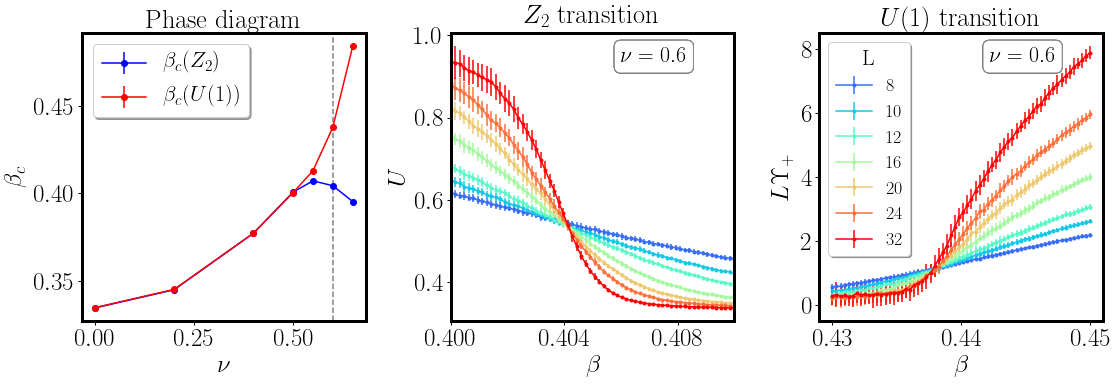

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(16,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_xlabel(r"$\nu$")


ax1[1].set_ylabel(r"$ U $")
ax1[2].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[0].set_ylabel(r"$\beta_c$")

# ax1[1].set_xlim((0.435,0.445))
# xticks = np.arange(0.435, 0.445, 0.005)
# ax1[1].set_xticks(xticks)

ax1[1].set_xlim((0.4,0.41))
xticks = np.arange(0.4, 0.41, 0.004)
ax1[1].set_xticks(xticks)


#ax1[0].set_ylim((0.25,1))
# ax1[1].set_ylim((-0.15,6))
DIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[1].errorbar(beta_U, U, yerr=err_U, fmt="o-", markersize='3', c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[1].transAxes) 
    ax1[2].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[2].transAxes) 

ax1[2].legend(loc="best", title="L", fontsize="18")
ax1[1].set_title("$Z_2$ transition")
ax1[2].set_title("$U(1)$ transition")

dataU= np.loadtxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2))
nu=dataU[0]
betac_U=dataU[1]
err_betac_U=dataU[2]
print(len(nu), len(betac_U))
dataZ= np.loadtxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_Z=dataZ[0]
betac_Z=dataZ[1]
err_betac_Z=dataZ[2]

dataZ_B= np.loadtxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_ZB=dataZ_B[0]
betac_ZB=dataZ_B[1]
err_betac_ZB=dataZ_B[2]


ax1[0].set_title("Phase diagram")

nu, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)
print(nu, betac_z2, err_betac_z2)
nu, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)


ax1[0].errorbar(nu, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].errorbar(nu, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",label=r"$\beta_c(U(1))$")

#ax1[2].errorbar(nu,betac_U, yerr= err_betac_U, fmt="o-", marker='o', c="red",label=r"$\beta_c(U(1))$")
#ax1[2].errorbar(nu_Z,betac_Z, yerr= err_betac_Z, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].axvline(x=0.6, ls="--", c="gray")
ax1[0].legend(loc="best")

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.85)
fig.savefig("%s/Reply_Fig.png" %(folder_fig) )

